<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/RNA_Libro/blob/main/P07_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Artificiales
# Capítulo 7
## Ejercicio práctico 7.14
### Red Neuronal Convolucional

Elaborado por: Nancy Arana-Daniel, Carlos Lopez-Franco, Javier Gomez-Avila, Carlos Villaseñor


(Información del Copyright)

## Introducción

En este ejercicio practico haremos un clasificador de dígitos escritos a mano alzada. La entrada a la red neuronal son imagenes en escala de grises y la salida es la clase de número al que pertenecen.

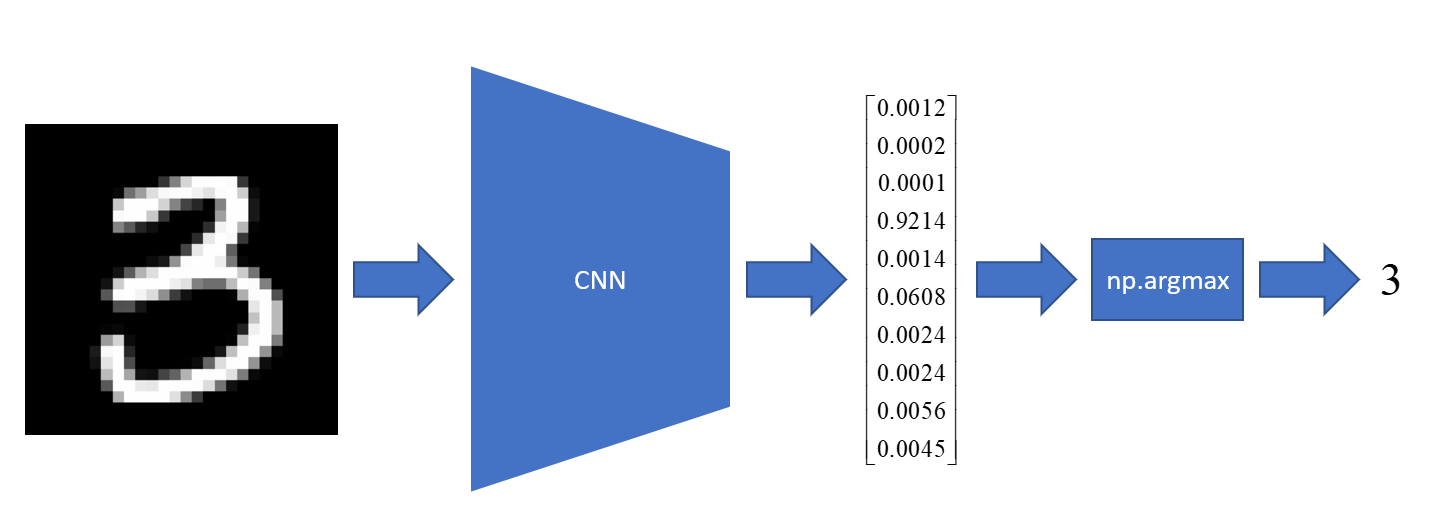

## Ejercicio práctico
1. Primeramente importamos los paquetes que necesitaremos.

In [1]:
# Importamos numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Importamos lo necesario para crear la red
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

# Importamos unos paquetes de sklearn para comprobar el modelo
from sklearn.metrics import classification_report, confusion_matrix

2. Cargamos el conjunto de datos de MNIST (http://yann.lecun.com/exdb/mnist/), este es un conjunto de imagenes de 28x28 pixeles de los digitos del 0 al 9 escritos a mano alzada. MNIST contiene 60000 imagenes para entranar y 10000 para probar.

In [9]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

3. Visualizamos ejemplos aleatorios del conjunto de datos (puedes correr el siguiente bloque varias veces).

In [ ]:
sample = np.random.randint(0,60000)
plt.imshow(xtrain[sample], cmap=plt.cm.gray)
plt.title('Label: ' + str(ytrain[sample]))

4. Para poder utilizar estas imagenes en una red neuronal es necesario normalizarlas, es decir que cada pixel sea un número flotante entre 0 y 1 (recordemos que los pixeles son números entreros entre 0-255). Además de esto necesitamos que la imagen sea un tensor de grado 3 con shape (nx, ny, nc). Por lo que hacemos el siguiente tratamiento:

In [ ]:
# Normalizamos la imagenes
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

# Agregamos el número de canales
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Mostramos el tamaño del conjunto de entrenamiento
print('Conjunto de entrenamiento: ', xtrain.shape)
print('Tamaño de cada imagen: ', input_shape)

5. La salida también necesita tratamiento, por lo que debemos de convertir los números a su codificación one-hot. Por ejemplo, la clase 3 se convertiria en el vector [0,0,0,1,0,0,0,0,0,0]^T. Importante: la siguiente celda tiene que se corrida solo una vez.

In [12]:
ytrain = keras.utils.to_categorical(ytrain, 10)

6. Construimos la Red Neuronal Concolucional. En este ejercicio tendrás que determinar la última capa de esta red neuronal.

In [13]:
def build_model():

  # El siguiente comando prepara a la red para 
  # recibir capas neuronales de forma sequencial.
  model = Sequential()

  # En la primer capa neuronal necesita definirse el tamaño
  # de la entrada. En este caso usamos 32 filtros de 3x3 y
  # función de activación ReLU.
  model.add(Conv2D(32,kernel_size=(3,3),
                   activation='relu',
                   input_shape=input_shape))
  
  # Usamos una capa de Pooling para disminuir el tamaño del
  # espacio, ya que la imagen tiene información redundante
  model.add(MaxPooling2D(pool_size=(2,2)))

  # La capa de DropOut es una técnica de regulación que nos
  # permite mitigar el sobreentrenamiento.
  model.add(Dropout(0.25))

  # Volvemos a repetir el bloque de Conv, Pooling, DropOut
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # ... y una vez más
  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # Una vez que el tensor es lo suficientemente pequeño, lo
  # vectorizamos para introduccirlo a una red neuronal densa
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))

  # Escribe áquí tu código ----------------------------------

  # El diseño de la última capa es definito por la salida deseada
  # Descomenta y modifica la siguiente línea, agregando el número
  # de neuronas y la función de activación adecuada.
  
  #model.add(Dense( , activation=))

  # ---------------------------------------------------------

  # Como último paso compilamos el modelo usando una función de 
  # costo adecuada para nuestro problema, en este caso es un
  # problema de clasificación con un solo ganador.
  # Además usamos el optimizador ADAM y la metrica Exactitud (Acc)
  model.compile(loss = keras.losses.categorical_crossentropy,
                optimizer = 'adam',
                metrics=['accuracy'])
  
  # Finalmente regresamos el modelo instanciado
  return model

7. Instanciamos la red neuronal convolucional e imprimimos un resumen de su arquitectura.

In [ ]:
model = build_model()
model.summary()

8. Entrenamos la red neuronal por un número suficiente de épocas.

In [ ]:
model.fit(xtrain, ytrain, batch_size=215, epochs=6, verbose=1,
          validation_split=0.17)

9. Hacemos la predicción sobre el conjunto de prueba (sobre el cual no se ha entrenado) y calculamos metricas de desempeño.

In [ ]:
# Hacemos predicciones sobre el conjunto de prueba
ypred=model.predict(xtest)

# Imprimimos un ejemplo de como es la salida
print('Salida de la red para una imagen:\n', ypred[0])

# Para convertirlo en un número usamos el argumento máximo
ypred = np.argmax(ypred, axis=1)

# Imprimimos el mismo ejemplo
print('Predicción para la imagen:\n', ypred[0])

# Reportamos los resultados
print('Reporte de clasificación:\n', classification_report(ytest, ypred))
print('Matriz de confusión:\n', confusion_matrix(ytest, ypred))

10. Para tener un poco más de intuición de los resultados, en el siguiente código seleccionamos un ejemplo aleatorio del conjunto de prueba y escribimos en el título de la imagen la predicción de la red convolucional. Puedes correr el siguiente bloque cuantas veces quieras.

In [ ]:

sample = np.random.randint(0,10000)
x = xtest[sample].reshape(28,28)
plt.imshow(x, cmap=plt.cm.gray)
plt.title('Prediction: ' + str(ypred[sample]))
plt.show()